In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [169]:
df_train_entrances = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv')

In [173]:
df_train_entrances.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,...,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
0,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775149,-73.912074
1,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.774810,-73.912151
2,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775025,-73.911891
3,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.774938,-73.912337
4,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,Hoyt Ave South,SW,40.770313,-73.917978


In [172]:
len(df_train_entrances['Station_Name'].unique())

355

36

In [3]:
df_train_stops = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [4]:
df_train_stops.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575


In [186]:
df_train_stops[df_train_stops['Stop Name'].str.contains('14 S')]

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
14,15,602,R20,BMT,Broadway - Brighton,14 St - Union Sq,M,N Q R W,Subway,40.735736,-73.990568
116,117,602,L03,BMT,Canarsie,Union Sq - 14 St,M,L,Subway,40.734789,-73.990730
164,166,618,A31,IND,8th Av - Fulton St,14 St,M,A C E,Subway,40.740893,-74.001690
227,229,601,D19,IND,6th Av - Culver,14 St,M,F M,Subway,40.738228,-73.996209
320,322,601,132,IRT,Broadway - 7Av,14 St,M,1 2 3,Subway,40.737826,-74.000201
404,406,602,635,IRT,Lexington - Shuttle,14 St - Union Sq,M,4 5 6,Subway,40.734673,-73.989951


In [5]:
len(df_train_stops['Stop Name'].unique())

376

In [ ]:
len(df_train_stops.groupby('Line').)

In [146]:
tt = df_train_stops.groupby(['Borough'])

In [147]:
tt.Division.unique()

Borough
Bk    [BMT, IND, IRT]
Bx         [IND, IRT]
M     [BMT, IND, IRT]
Q     [BMT, IND, IRT]
SI              [SIR]
Name: Division, dtype: object

### Making a df from turnstile data

In [6]:
dates = ['170624', '170617', '170610', '170603', '170527', '170520', '170513', '170506', '160625', '160618', '160611', '160604', '160528', '160521', '160514', '160507']

chronological_dates = list(reversed(dates))

In [54]:
turnstile_df = pd.DataFrame()

for date in chronological_dates:
    base = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    url = base + date + '.txt'
    print(url)
    df = pd.read_csv(url)
    turnstile_df = pd.concat([turnstile_df, df], ignore_index=True)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160611.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160618.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160625.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170

In [55]:
turnstile_df.head(6)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254


In [177]:
turnstile_df.groupby(['STATION', 'LINENAME']).sum()

ENTRIES          EXITS          TOTAL
STATION         LINENAME                                                 
1 AV            L             1039881752893  1405146047610  2445027800503
103 ST          1               40151705868    21213530499    61365236367
                6               42730188288   376786314195   419516502483
                BC              17617838072    15637748160    33255586232
103 ST-CORONA   7               45635828004    43027327241    88663155245
104 ST          A             1181769740719  1184567696247  2366337436966
                JZ            1660716774996  1006689815034  2667406590030
110 ST          6               19714779984    19875112838    39589892822
111 ST          7               28933889889    17457532685    46391422574
                A               50313701834    18685055097    68998756931
                J               10672177898     9716579721    20388757619
116 ST          23              21765949456    10426111080    32192060536
                6               26528597021    22174844225    48703441246
                BC            1112033984543  1371012811658  2483046796201
116 ST-COLUMBIA 1              825251817147   175387949683  1000639766830
121 ST          JZ               7409193703     4277083633    11686277336
125 ST          1              446629712285   230529286373   677158998658
                23            2500774688653  1562165298804  4062939987457
                456           1385322439413   595697063705  1981019503118
                ACBD           328183297780   272824472164   601007769944
135 ST          23              26879110274    10950321808    37829432082
                BC             136631843744    20905117161   157536960905
137 ST CITY COL 1              303608455392   602484400485   906092855877
138/GRAND CONC  45             670027661912   647005839584  1317033501496
14 ST           123FLM        1003080595282  1066212419263  2069293014545
                ACEL           896152441126   422420651390  1318573092516
                FLM123          40437768133    42914614057    83352382190
14 ST-UNION SQ  456LNQR        113725579550    29724709786   143450289336
                456LNQRW       103132219821    29226646820   132358866641
                LNQR456        398187762573   150401030919   548588793492
...                                     ...            ...            ...
TIMES SQ-42 ST  ACENQRS1237      4282043793     6461455073    10743498866
                ACENQRS1237W     5632242797     8473175287    14105418084
TOMPKINSVILLE   1                6250704256     1699951202     7950655458
TREMONT AV      BD              92501806264     8633784586   101135590850
TWENTY THIRD ST 1                2404854901     1543085813     3947940714
UNION ST        R               14704633799    15221469513    29926103312
UTICA AV        AC              97499738388    35273514492   132773252880
V.CORTLANDT PK  1               13093087849     5112627647    18205715496
VAN SICLEN AV   3               10429457478     6287799427    16717256905
                JZ               8757580364     8586661394    17344241758
VAN SICLEN AVE  C                8521619698     8800437782    17322057480
VERNON-JACKSON  7               24105524444    16471322481    40576846925
W 4 ST-WASH SQ  ABCDEFM        427617225461   353389341215   781006566676
W 8 ST-AQUARIUM FQ               7709693762     8332324968    16042018730
WAKEFIELD/241   2               11799989179    12190785530    23990774709
WALL ST         23              77551907065    68235600776   145787507841
                45             361938498928   190391227805   552329726733
WEST FARMS SQ   25             298197719170    48929424117   347127143287
WESTCHESTER SQ  6               16807322092    15559314092    32366636184
WHITEHALL S-FRY R1              92350394557    21805922832   114156317389
                R1W             91523537404    22742139474   114265676878
WHITLOCK AV     6              150435952

In [9]:
len(turnstile_df['STATION'].unique())

380

In [11]:
df_train_stops[df_train_stops['Stop Name'].str.contains('Norwood')]

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
87,88,88,J21,BMT,Jamaica,Norwood Av,Bk,J Z,Elevated,40.681410,-73.880039
208,210,210,D01,IND,Concourse,Norwood - 205 St,Bx,D,Subway,40.874811,-73.878855


### Get and Compute the total number of people in and out of each station, each day.

In [15]:
def ppl_per_day_turnst(dt, dataframe):

'''function to subtract the starting number (at 00:00:00 hrs) from the end-of-day (at 20:00:00 hrs) number 
for each turnstile
----------
dt = list of dates to get numbers for
dataframe = dataframe from MTA turnstile data


'''
    date = dt[0]
    
    time00 = (turnstile_df.loc[(turnstile_df.DATE == '09/09/2017') & (turnstile_df.TIME == '00:00:00'), :]) #get rows for start of day
    time20 = (turnstile_df.loc[(turnstile_df.DATE == '09/09/2017') & (turnstile_df.TIME == '20:00:00'), :])  # get rows for end of day
    print(len(time00))
    print(len(time20))
    #print(time20.SCP.iloc[2])
    pplDelta = pd.Series(range(len(time20)))  #create data frame
    for row in range(len(time20)): 
        if time20.SCP.iloc[row] == time00.SCP.iloc[row]:  # if the SCP col is the same = same turnstyle
            pplDelta[row] = int(time20.ENTRIES.iloc[row]) - int(time00.ENTRIES.iloc[row])  #subtract numb from start of day from end of day for each turnstyle
        else:
            continue  # skip if if there's not a pair of numbers for a turn style
    print(len(pplDelta)) 

SyntaxError: invalid syntax (<ipython-input-15-1719be995850>, line 1)

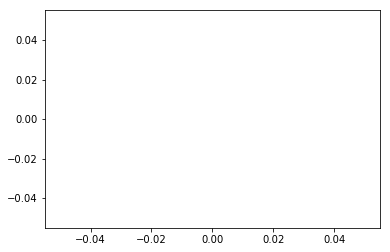

In [14]:
plt.plot(range(len(time00)),pplDelta)

### Extract columns of interest and determine which stations have the highest traffic

In [56]:
%%capture
turnstile_df.rename(columns=lambda x: x.strip(), inplace=True)

In [57]:
turnstile_df['TOTAL'] = turnstile_df['EXITS'] + turnstile_df['ENTRIES']

In [60]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,7549924
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,7549984
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,7550038
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,7550292
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,7550651


In [110]:
turnstile_df[(turnstile_df['LINENAME'] == 'FQ') & (turnstile_df['STATION'] == 'W 8 ST-AQUARIUM')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
28517,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,00:00:00,REGULAR,4185130,8401619,12586749
28518,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,04:00:00,REGULAR,4185132,8401633,12586765
28519,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,08:00:00,REGULAR,4185134,8401651,12586785
28520,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,12:00:00,REGULAR,4185143,8401752,12586895
28521,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,16:00:00,REGULAR,4185169,8401987,12587156
28522,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,20:00:00,REGULAR,4185225,8402114,12587339
28523,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,05/01/2016,00:00:00,REGULAR,4185231,8402152,12587383
28524,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,05/01/2016,04:00:00,REGULAR,4185231,8402164,12587395
28525,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,05/01/2016,08:00:00,REGULAR,4185232,8402180,12587412
28526,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,05/01/2016,12:00:00,REGULAR,4185240,8402237,12587477


In [63]:
turnstile_extract_data_df = turnstile_df[['DATE', 'STATION', 'SCP', 'TOTAL']]

In [64]:
def find_busiest_stations(number, turnstile_df):
    """
    Takes a dataframe and a number n of desired stations and outputs the n busiest stations
    ---
    INPUTS: number, the number of top busiest stations desired and turnstile_df which contains all entrances and exits by day
    OUTPUT: a data frame
    """
    turnstile_extract_data_df = turnstile_df[['DATE', 'STATION', 'SCP', 'TOTAL']]
    return turnstile_extract_data_df.groupby('STATION').sum().sort_values('TOTAL', ascending=False).iloc[:number]

find_busiest_stations(5, turnstile_df)
    

,TOTAL
STATION,
42 ST-PORT AUTH,9689026885689
23 ST,8875653942933
CANAL ST,7509124616947
125 ST,7322126259177
57 ST-7 AV,7108099824153


In [65]:
turnstile_extract_data_df.head()

,DATE,STATION,SCP,TOTAL
0,04/30/2016,59 ST,02-00-00,7549924
1,04/30/2016,59 ST,02-00-00,7549984
2,04/30/2016,59 ST,02-00-00,7550038
3,04/30/2016,59 ST,02-00-00,7550292
4,04/30/2016,59 ST,02-00-00,7550651


In [ ]:
def top_candidates(dates, number_stations, turnstile_df):
    turnstile_df = turnstile_df.set_index(['DATE'])
    turnstile_extract_data_df = turnstile_df[['STATION', 'SCP', 'ENTRIES', 'EXITS', 'TIME']]
    turnstile_extract_data_df.loc[dates[0]:dates[1]]
    return turnstile_extract_data_df.groupby('STATION').sum().sort_values('ENTRIES', ascending=False).iloc[:number]

In [68]:
turnstile_extract_data_df.groupby(['DATE', 'STATION']).sum().reset_index()

,DATE,STATION,ENTRIES,EXITS
0,2016-04-30,1 AV,9365210271,20854612574
1,2016-04-30,103 ST,892638599,3544368714
2,2016-04-30,103 ST-CORONA,378975718,362039578
3,2016-04-30,104 ST,23169535488,19004122751
4,2016-04-30,110 ST,159862081,162864019
5,2016-04-30,111 ST,673600452,356017489
6,2016-04-30,116 ST,10276594732,12442349367
7,2016-04-30,116 ST-COLUMBIA,7265898961,1539554961
8,2016-04-30,121 ST,48384391,39860241
9,2016-04-30,125 ST,41489443857,23643722474


In [66]:
turnstile_extract_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127257 entries, 0 to 3127256
Data columns (total 4 columns):
DATE       object
STATION    object
SCP        object
TOTAL      int64
dtypes: int64(1), object(3)
memory usage: 95.4+ MB


In [67]:
turnstile_extract_data_df['DATE'] = pd.to_datetime(turnstile_extract_data_df['DATE'], format='%m/%d/%Y')

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
turnstile_extract_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127257 entries, 0 to 3127256
Data columns (total 4 columns):
DATE       datetime64[ns]
STATION    object
SCP        object
TOTAL      int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 95.4+ MB


In [69]:
turnstile_extract_data_df.head()

,DATE,STATION,SCP,TOTAL
0,2016-04-30,59 ST,02-00-00,7549924
1,2016-04-30,59 ST,02-00-00,7549984
2,2016-04-30,59 ST,02-00-00,7550038
3,2016-04-30,59 ST,02-00-00,7550292
4,2016-04-30,59 ST,02-00-00,7550651


In [70]:
turnstile_extract_data_df['weekday'] = turnstile_extract_data_df['DATE'].dt.dayofweek

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [71]:
 turnstile_extract_data_df.head(20)

,DATE,STATION,SCP,TOTAL,weekday
0,2016-04-30,59 ST,02-00-00,7549924,5
1,2016-04-30,59 ST,02-00-00,7549984,5
2,2016-04-30,59 ST,02-00-00,7550038,5
3,2016-04-30,59 ST,02-00-00,7550292,5
4,2016-04-30,59 ST,02-00-00,7550651,5
5,2016-04-30,59 ST,02-00-00,7551056,5
6,2016-05-01,59 ST,02-00-00,7551302,6
7,2016-05-01,59 ST,02-00-00,7551329,6
8,2016-05-01,59 ST,02-00-00,7551379,6
9,2016-05-01,59 ST,02-00-00,7551540,6


In [80]:
turnstile_extract_data_df.groupby(['weekday', 'STATION']).sum().reset_index()

,weekday,STATION,TOTAL
0,0,1 AV,356874745184
1,0,103 ST,74261453505
2,0,103 ST-CORONA,12484304119
3,0,104 ST,739000710642
4,0,110 ST,5623885804
5,0,111 ST,19572118370
6,0,116 ST,367424324305
7,0,116 ST-COLUMBIA,144208743164
8,0,121 ST,1350677834
9,0,125 ST,1047719371449


In [149]:
turnstile_extract_data_df.groupby(['weekday', 'STATION']).sum().head()

TOTAL
weekday STATION                    
0       1 AV           356874745184
        103 ST          74261453505
        103 ST-CORONA   12484304119
        104 ST         739000710642
        110 ST           5623885804

In [148]:
dff = turnstile_extract_data_df.sort_values(['weekday', 'TOTAL'], ascending=[True,False])
dff.head()

,DATE,STATION,SCP,TOTAL,weekday
3021015,2017-06-19,47-50 STS ROCK,01-03-02,3959266077,0
3021014,2017-06-19,47-50 STS ROCK,01-03-02,3959263893,0
3021013,2017-06-19,47-50 STS ROCK,01-03-02,3959262737,0
3021012,2017-06-19,47-50 STS ROCK,01-03-02,3959260774,0
3021011,2017-06-19,47-50 STS ROCK,01-03-02,3959260280,0


In [124]:
dff[dff['weekday']==0].iloc[:5]

,DATE,STATION,SCP,TOTAL,weekday
3021015,2017-06-19,47-50 STS ROCK,01-03-02,3959266077,0
3021014,2017-06-19,47-50 STS ROCK,01-03-02,3959263893,0
3021013,2017-06-19,47-50 STS ROCK,01-03-02,3959262737,0
3021012,2017-06-19,47-50 STS ROCK,01-03-02,3959260774,0
3021011,2017-06-19,47-50 STS ROCK,01-03-02,3959260280,0


In [131]:
dff2 = dff.groupby(['weekday', 'STATION']).sum().reset_index()
dff2.head()

,weekday,STATION,TOTAL
0,0,1 AV,356874745184
1,0,103 ST,74261453505
2,0,103 ST-CORONA,12484304119
3,0,104 ST,739000710642
4,0,110 ST,5623885804


In [133]:
dff2[dff2['weekday']==1].iloc[:5]

,weekday,STATION,TOTAL
380,1,1 AV,365832768659
381,1,103 ST,71248431928
382,1,103 ST-CORONA,12841212433
383,1,104 ST,733313910030
384,1,110 ST,5833756337


In [162]:
from datetime import datetime
date = '09/20/2017'
desired_date = datetime.strptime(date, '%m/%d/%Y').weekday()
print(desired_date)

2


In [165]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,7549924
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,7549984
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,7550038
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,7550292
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,7550651


In [168]:
from datetime import datetime
date = '09/20/2017'
def select_stations(date, number_of_stations, turnstile_df):
    desired_date = datetime.strptime(date, '%m/%d/%Y').weekday()
    turnstile_extract_data_df = turnstile_df[['DATE', 'STATION', 'SCP', 'TOTAL']]
    turnstile_extract_data_df['DATE'] = pd.to_datetime(turnstile_extract_data_df['DATE'], format='%m/%d/%Y')
    turnstile_extract_data_df['WEEKDAY'] = turnstile_extract_data_df['DATE'].dt.dayofweek
    sorted_df = turnstile_extract_data_df.sort_values(['WEEKDAY', 'TOTAL'], ascending=[True,False])
    grouped_df = sorted_df.groupby(['WEEKDAY', 'STATION']).sum().reset_index()
    return grouped_df[grouped_df['WEEKDAY']==desired_date].iloc[:number_of_stations]
    
select_stations(date, 5, turnstile_df)

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,WEEKDAY,STATION,TOTAL
760,2,1 AV,360158007704
761,2,103 ST,81331147428
762,2,103 ST-CORONA,12749632435
763,2,104 ST,716216058501
764,2,110 ST,5814339012
